## load an object detection model from the tensorflowhub and use it for inference  

we'll use the tensorflow link to load the model. loading the model from a locally saved file is not covered in this notebook

In [24]:
import tensorflow_hub as hub
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
model = hub.KerasLayer("https://tfhub.dev/tensorflow/efficientdet/lite0/detection/1")

In [18]:
model.get_config()

{'name': 'keras_layer_1',
 'trainable': False,
 'dtype': 'float32',
 'handle': 'https://tfhub.dev/tensorflow/efficientdet/lite0/detection/1'}

#### coco 2017 labels from the paper 

In [19]:
labels = ['person','bicycle','car','motorcycle','airplane','bus','train','truck','boat','traffic light','fire hydrant','street sign','stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe','hat','backpack','umbrella','shoe','eye glasses','handbag','tie','suitcase','frisbee','skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','plate','wine glass','cup','fork','knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch','potted plant','bed','mirror','dining table','window','desk','toilet','door','tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','blender','book','clock','vase','scissors','teddy bear','hair drier','toothbrush','hair brush']

#### get the prediction 

In [25]:
def get_prediction(model, img_path):
    image = Image.open(img_path)
    imagetensor = tf.convert_to_tensor(image, dtype=tf.uint8, dtype_hint=None, name=None)
    imagetensor_reshaped = tf.expand_dims(imagetensor, axis=0, name=None)
    output = model(imagetensor_reshaped)
    return output

In [26]:
import cv2
import numpy as np

#### visualize the output 

In [41]:
def viz(model, img_path, proba_threshold=0.5):
    boxes, scores, classes, num_detections = get_prediction(model, img_path)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i, score in enumerate(scores[0]):
        if score > proba_threshold:
            index = i
            labelindex = int(classes[0][index].numpy()) - 1
            ymin, xmin, width, height = map(int, boxes[0][index].numpy())
            cv2.putText(image, labels[labelindex], (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
            cvrect = cv2.rectangle(image, (xmin, ymin), (height, width), (255,255,255), 1)
    plt.figure(figsize=(10,10))
    plt.imshow(image)

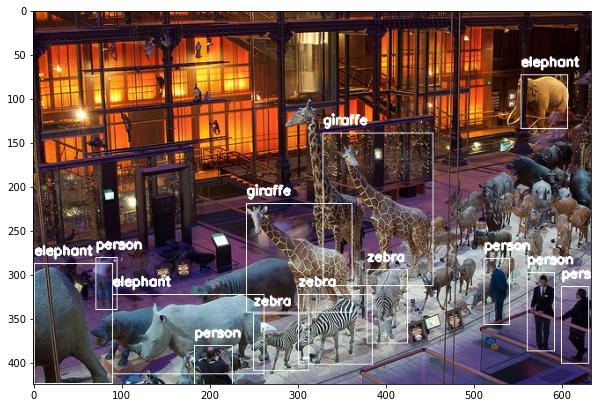

In [42]:
viz(model, 'person_animals.jpg', proba_threshold=0.2)

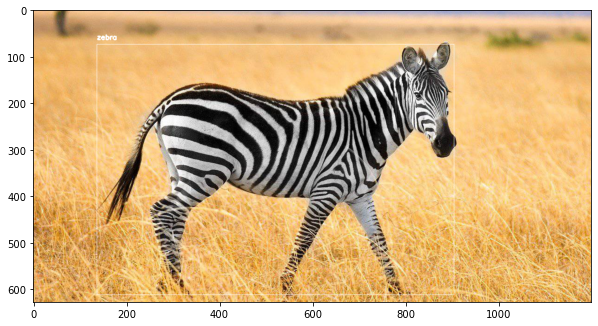

In [43]:
viz(model, 'zebra.jpg', 0.5)

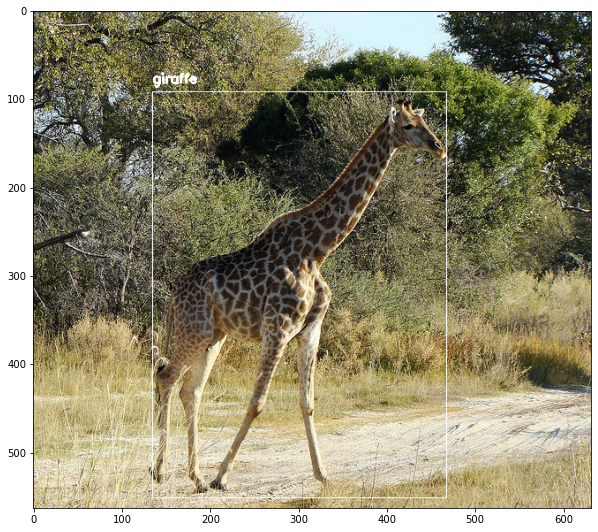

In [44]:
viz(model, 'giraffe.jpg')

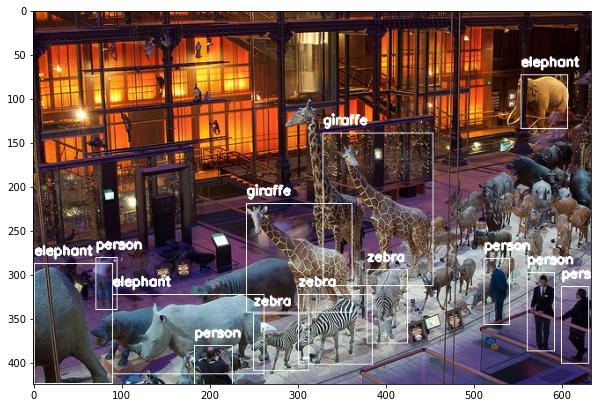

In [45]:
viz(model, 'person_animals.jpg', 0.2)

## appendix 

In [291]:
boxes, scores, classes, num_detections = get_prediction(model, 'person_animals.jpg')

In [292]:
scores

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.603184  , 0.5779627 , 0.57303864, 0.51897055, 0.4857338 ,
        0.47034287, 0.41765776, 0.41340518, 0.39851987, 0.39028877,
        0.38180262, 0.23190492, 0.20326583, 0.1950395 , 0.17586763,
        0.16855754, 0.16526194, 0.1647814 , 0.16107228, 0.16068034,
        0.1605339 , 0.15255283, 0.14908946, 0.14300443, 0.14252321,
        0.1370887 , 0.13375936, 0.12965208, 0.12669073, 0.1261684 ,
        0.1222738 , 0.12186077, 0.12142838, 0.11964393, 0.11949864,
        0.11923932, 0.1161714 , 0.11523449, 0.11046296, 0.10933039,
        0.10776106, 0.1072265 , 0.10664311, 0.10096025, 0.1009175 ,
        0.10071313, 0.10035039, 0.10003623, 0.09933838, 0.09665754,
        0.09542258, 0.09509807, 0.0946907 , 0.09426934, 0.09398162,
        0.09324392, 0.09307286, 0.09116461, 0.08992741, 0.08949963,
        0.08698849, 0.08636895, 0.08536285, 0.08510658, 0.08495257,
        0.0834854 , 0.08232098, 0.08229026, 0.07945722, 0.078472  

In [294]:
proba_threshold = 0.2
for i, score in enumerate(scores[0]):
    if score > proba_threshold:
        print(f'score: {score}, index: {i}')

score: 0.6031839847564697, index: 0
score: 0.5779626965522766, index: 1
score: 0.573038637638092, index: 2
score: 0.5189705491065979, index: 3
score: 0.4857338070869446, index: 4
score: 0.47034287452697754, index: 5
score: 0.4176577627658844, index: 6
score: 0.413405179977417, index: 7
score: 0.3985198736190796, index: 8
score: 0.390288770198822, index: 9
score: 0.38180261850357056, index: 10
score: 0.23190492391586304, index: 11
score: 0.20326583087444305, index: 12


In [273]:
boxes, scores, classes, num_detections = get_prediction(model, 'cat.jpg')

In [274]:
scores

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.5861348 , 0.19766977, 0.04472347, 0.03159756, 0.02978539,
        0.02146025, 0.01531869, 0.01242454, 0.00998039, 0.00997353,
        0.0090656 , 0.00905575, 0.00876562, 0.00846238, 0.0079648 ,
        0.00688475, 0.00684233, 0.00618969, 0.00616234, 0.0060263 ,
        0.00598683, 0.00598584, 0.0057689 , 0.00533749, 0.00533645,
        0.0051912 , 0.00516422, 0.00511838, 0.0047547 , 0.00469281,
        0.0046255 , 0.00449699, 0.00443016, 0.00425077, 0.00410483,
        0.00391855, 0.00383482, 0.00375719, 0.00374688, 0.0036721 ,
        0.0036311 , 0.0035776 , 0.00349445, 0.0034637 , 0.00328056,
        0.00309546, 0.00308211, 0.00307737, 0.00292211, 0.00287599,
        0.00285904, 0.0028524 , 0.00280324, 0.00278472, 0.00276315,
        0.00272282, 0.00271299, 0.00268218, 0.00263689, 0.00260597,
        0.00258047, 0.0025325 , 0.00251449, 0.00247976, 0.00244631,
        0.00242948, 0.0024229 , 0.00239765, 0.0023871 , 0.00232326

In [279]:
classes

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[65., 17., 65., 17., 16., 17., 65., 16., 16., 65., 65., 16., 16.,
        17., 65., 17., 88., 65., 62., 17., 16., 65., 16.,  1., 88.,  1.,
        65., 16., 16., 16., 17., 65.,  1., 65., 65.,  1.,  1., 17.,  1.,
        16., 16., 16.,  1., 65., 16.,  1., 65., 16., 16., 16.,  1.,  1.,
        16., 16., 65.,  1., 16., 65., 65., 20.,  1., 16.,  1.,  1., 85.,
        16., 16., 16.,  1., 16.,  1., 65.,  1., 65., 17.,  1.,  1.,  1.,
        65.,  1., 16., 16., 16.,  1., 16.,  1., 67., 16., 16.,  1.,  1.,
        65.,  1., 16., 16.,  1.,  1., 16., 88.,  1.]], dtype=float32)>

In [280]:
labels[17-1]

'cat'